# Machine-learning sur les données du TITANIC


## Import des librairies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV

sns.set_style("whitegrid")

## Import des csv

In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv")
gender_submission = pd.read_csv("https://raw.githubusercontent.com/minsuk-heo/kaggle-titanic/master/input/gender_submission.csv")

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


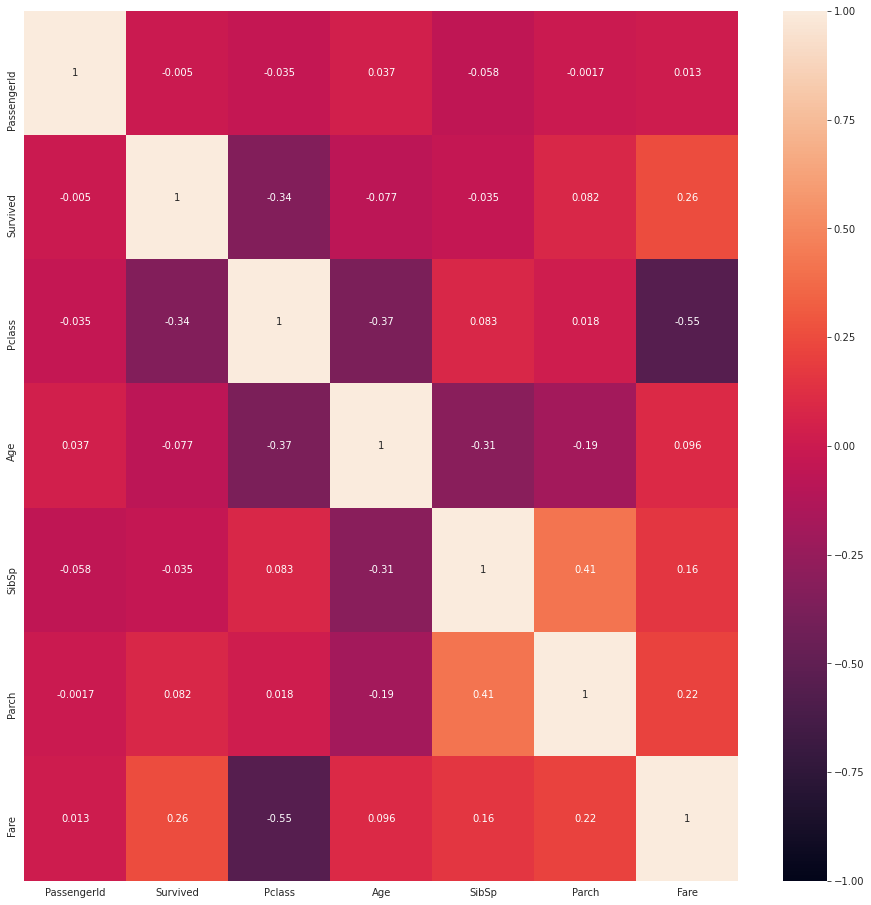

In [ ]:
fig, ax = plt.subplots(figsize=(16,16))
_ = sns.heatmap(train.corr(),vmin=-1, vmax=1, annot=True, ax = ax)

In [ ]:
# Somme de toutes les données manquantes, exprimé en %

total = train.isnull (). sum (). sort_values(ascending = False ) 

percent_1 = train.isnull (). sum () / train.isnull (). count () * 100 
percent_2 = (round (percent_1, 1) ) .sort_values(ascending = False ) 

missing_data = pd.concat ([total, percent_2], axis = 1, keys = ['Total', '%']) 

missing_data.head(12)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


On peut remarquer que 687 numéros de cabine et 177 âges ne sont pas renseignées. Cela corespond respectivement à 77% et à 20% des valeurs.

In [ ]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [ ]:
arr1=[]
nb_fem = len(train[train['Sex']=='female'])
nb_mal = len(train[train['Sex']=='male'])
arr1.append(len(train[(train['Sex']=='female')&(train['Survived']==1)]))
arr1.append(len(train[(train['Sex']=='female')&(train['Survived']==0)]))
arr1.append(len(train[(train['Sex']=='male')&(train['Survived']==1)]))
arr1.append(len(train[(train['Sex']=='male')&(train['Survived']==0)]))

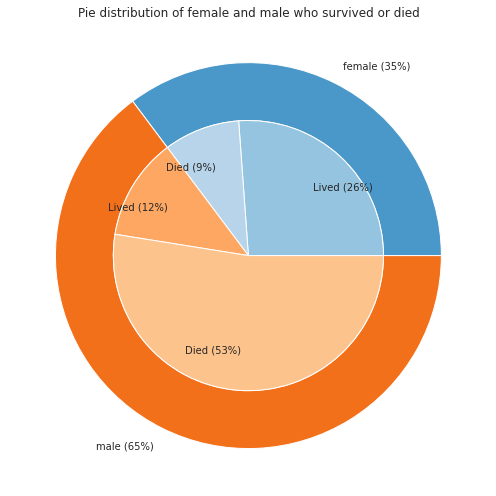

In [ ]:
group_names=[f'female ({round(100*(arr1[0] + arr1[1])/(nb_fem+nb_mal))}%)',
             f'male ({round(100*(arr1[2] + arr1[3])/(nb_fem+nb_mal))}%)']
group_size=[(arr1[0] + arr1[1]), (arr1[2] + arr1[3])]
subgroup_names=[f'Lived ({round(100*(arr1[0])/(nb_fem+nb_mal))}%)',
                f'Died ({round(100*(arr1[1])/(nb_fem+nb_mal))}%)',
                f'Lived ({round(100*(arr1[2])/(nb_fem+nb_mal))}%)',
                f'Died ({round(100*(arr1[3])/(nb_fem+nb_mal))}%)']
subgroup_size=[arr1[0],arr1[1],arr1[2],arr1[3]]

# Create colors
a, b=[plt.cm.Blues, plt.cm.Oranges]

# First Ring (outside)
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1, labels=group_names, 
                  colors= [a(0.6), b(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1-0.3, 
                   labels=subgroup_names, labeldistance=0.7, 
                   colors=[a(0.4), a(0.3), b(0.4), b(0.3)])
plt.setp( mypie2, width=0.7, edgecolor='white')
plt.margins(0,0)

ax.set(title="Pie distribution of female and male who survived or died")
plt.tight_layout()
plt.show()

Ce camembert permet de bien visualiser la différence entre la survie des hommes et des femmes. Les hommes, bien que plus nombreux par rapport aux femmes, sont moins nombreux à avoir survécu.

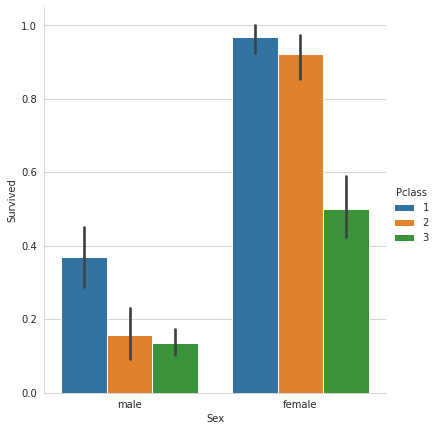

In [ ]:
g = sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=train)
g.fig.set_size_inches(6,6)

In [ ]:
arr_embarked=[]
embarked_s = len(train[train['Embarked']=='S'])
embarked_c = len(train[train['Embarked']=='C'])
embarked_q = len(train[train['Embarked']=='Q'])
print(embarked_s, embarked_c, embarked_q)
arr_embarked.append(len(train[(train['Embarked']=='S')&(train['Survived']==1)]))
arr_embarked.append(len(train[(train['Embarked']=='S')&(train['Survived']==0)]))
arr_embarked.append(len(train[(train['Embarked']=='C')&(train['Survived']==1)]))
arr_embarked.append(len(train[(train['Embarked']=='C')&(train['Survived']==0)]))
arr_embarked.append(len(train[(train['Embarked']=='Q')&(train['Survived']==1)]))
arr_embarked.append(len(train[(train['Embarked']=='Q')&(train['Survived']==0)]))

644 168 77


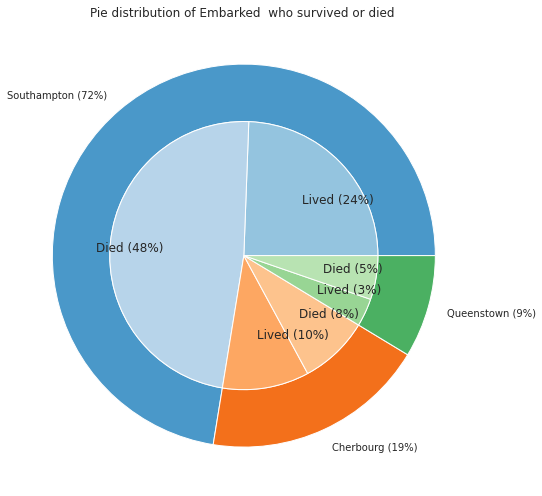

In [ ]:
group_names=[f'Southampton ({round(100*embarked_s/(embarked_c+embarked_q+embarked_s))}%)',
             f'Cherbourg ({round(100*embarked_c/(embarked_c+embarked_q+embarked_s))}%)',
             f'Queenstown ({round(100*embarked_q/(embarked_c+embarked_q+embarked_s))}%)']
group_size=[(arr_embarked[0] + arr_embarked[1]), (arr_embarked[2] + arr_embarked[3]),(arr_embarked[4] + arr_embarked[5])]
subgroup_names=[f'Lived ({round(100*arr_embarked[0]/(embarked_c+embarked_q+embarked_s))}%)',
                f'Died ({round(100*arr_embarked[1]/(embarked_c+embarked_q+embarked_s))}%)',
                f'Lived ({round(100*arr_embarked[2]/(embarked_c+embarked_q+embarked_s))}%)',
                f'Died ({round(100*arr_embarked[3]/(embarked_c+embarked_q+embarked_s))}%)',
                f'Lived ({round(100*arr_embarked[4]/(embarked_c+embarked_q+embarked_s))}%)',
                f'Died ({round(100*arr_embarked[5]/(embarked_c+embarked_q+embarked_s))}%)']
subgroup_size=[arr_embarked[0],arr_embarked[1],arr_embarked[2],arr_embarked[3],arr_embarked[4],arr_embarked[5]]

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Oranges,plt.cm.Greens]

# First Ring (outside)
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1, labels=group_names, 
                  colors= [a(0.6), b(0.6),c(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1-0.3, 
                   labels=subgroup_names, labeldistance=0.6, 
                   colors=[a(0.4), a(0.3), b(0.4), b(0.3),c(0.4),c(0.3)],textprops={'fontsize': 12})
plt.setp( mypie2, width=0.7, edgecolor='white')
plt.margins(0,0)

ax.set(title="Pie distribution of Embarked  who survived or died ")
plt.tight_layout()
plt.show()

## Extraction du titre des passagers

In [ ]:
train['Title']=0
train['Title']=train.Name.str.extract('([A-Za-z]+)\.')
display(train.Title.unique())

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
for title in train.Title.unique():
  for classe in train.Pclass.unique():
    train.loc[(train.Age.isna())&(train.Title==title)&(train.Pclass==classe),'Age']= train.Age[(train.Title==title)&(train.Pclass==classe)].mean()

train['Title'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess','Jonkheer'],
       ['Other', 'Women_Child', 'Women_Child', 'Women_Child', 'Noble', 'Noble', 'Noble', 'Women_Child', 'Women_Child',
       'Noble', 'Women_Child', 'Noble', 'Women_Child', 'Noble', 'Noble', 'Women_Child','Noble'],inplace=True)

train = train.round({'Age': 0})
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Other
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Women_Child
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Women_Child
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Women_Child
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Other


In [ ]:
arr_title=[]
other = len(train[train['Title']== 'Other'])
wc = len(train[train['Title']== 'Women_Child'])
nob = len(train[train['Title']== 'Noble'])
arr_title.append(len(train[(train['Title']== 'Other')&(train['Survived']==1)]))
arr_title.append(len(train[(train['Title']== 'Other')&(train['Survived']==0)]))
arr_title.append(len(train[(train['Title']== 'Women_Child')&(train['Survived']==1)]))
arr_title.append(len(train[(train['Title']== 'Women_Child')&(train['Survived']==0)]))
arr_title.append(len(train[(train['Title']== 'Noble')&(train['Survived']==1)]))
arr_title.append(len(train[(train['Title']== 'Noble')&(train['Survived']==0)]))

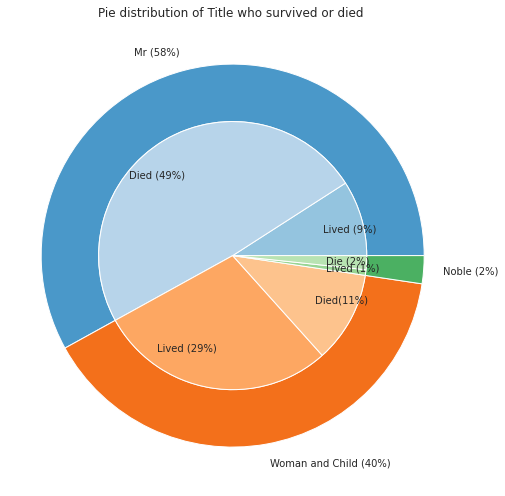

In [ ]:
group_names=[f'Mr ({round(100*other/(other+wc+nob))}%)',
             f'Woman and Child ({round(100*wc/(other+wc+nob))}%)',
             f'Noble ({round(100*nob/(other+wc+nob))}%)']
group_size=[(arr_title[0] + arr_title[1]), (arr_title[2] + arr_title[3]),(arr_title[4] + arr_title[5])]
subgroup_names=[f'Lived ({round(100*arr_title[0]/(other+wc+nob))}%)',
                f'Died ({round(100*arr_title[1]/(other+wc+nob))}%)',
                f'Lived ({round(100*arr_title[2]/(other+wc+nob))}%)',
                f'Died({round(100*arr_title[3]/(other+wc+nob))}%) ',
                f'Lived ({round(100*arr_title[4]/(other+wc+nob))}%)',
                f'Die ({round(100*arr_title[5]/(other+wc+nob))}%)']
subgroup_size=[arr_title[0],arr_title[1],arr_title[2],arr_title[3],arr_title[4],arr_title[5]]

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Oranges,plt.cm.Greens]

# First Ring (outside)
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1, labels=group_names, 
                  colors= [a(0.6), b(0.6),c(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1-0.3, 
                   labels=subgroup_names, labeldistance=0.7, 
                   colors=[a(0.4), a(0.3), b(0.4), b(0.3),c(0.4),c(0.3)],textprops={'fontsize': 10})
plt.setp( mypie2, width=0.7, edgecolor='white')
plt.margins(0,0)

ax.set(title="Pie distribution of Title who survived or died ")
plt.tight_layout()
plt.show()

## Traitement des données manquantes de la colonne Embarked

In [ ]:
display(train.Embarked.value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
display(train[train.Embarked.isna()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Women_Child
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Women_Child


In [ ]:
# On remplace les valeurs manquantes par la valeur la plus présente de le dataset
train['Embarked'] = train['Embarked'].fillna('S')

## Traitement des colonnes Ticket et Fare

Certains tickets sont présents plusieurs fois dans le dataset, cependant, le prix correspond au prix global pour le ticket et non au prix par personne.



In [ ]:
train.Ticket.value_counts()

CA. 2343    7
347082      7
1601        7
CA 2144     6
3101295     6
           ..
17764       1
248731      1
349251      1
349236      1
350035      1
Name: Ticket, Length: 681, dtype: int64

### Division du prix du ticket par le nombre de personne disposant du même ticket

In [ ]:
dup_ticket = pd.DataFrame(train['Ticket'].value_counts())
dup_ticket['TicketCount'] = dup_ticket['Ticket'] # duplique la colonne Ticket
dup_ticket['Ticket'] = dup_ticket.index # rajoute une colonne Ticket pour le merge (jointure)
 
# Reporte le résultat dans le dataframe test (jointure des datasets)
train = pd.merge(train, dup_ticket, how='inner', on='Ticket', validate='m:1')
train['Unit_Fare'] = train['Fare'] / train['TicketCount']
display(train[['Fare', 'TicketCount', 'Unit_Fare']].head())

,Fare,TicketCount,Unit_Fare
0,7.2500,1,7.2500
1,71.2833,1,71.2833
2,7.9250,1,7.9250
3,53.1000,2,26.5500
4,53.1000,2,26.5500


### Ajout de la colonne Ticket_prefix

La colonne spécifiera si le numéro de Ticket dispose d'un préfixe ou non. Même si nous ne comprenons pas à quoi cela peut correspondre, peut être le préfixe a t'il une influence sur la survie des passagers.

In [ ]:
def return_link(x):
  if len(x["Ticket"].split(' ')) > 1:
    return 1
  else:
    return 0

train['Ticket_prefix'] = train.apply(return_link, axis=1)
display(train[['Ticket_prefix']].head())

,Ticket_prefix
0,1
1,1
2,1
3,0
4,0


## Conversion de l'âge en catégorie d'âges

In [ ]:
age = train.Age
catAge = []
for i in range(train.shape[0]) :
    if age[i] <= 3:
        catAge.append("bebe")
    elif age[i] > 3 and age[i] <= 16:
        catAge.append("enfant")
    elif age[i] > 16 and age[i] <= 30:
        catAge.append("jeune_adulte")
    elif age[i] > 30 and age[i] <= 60:
        catAge.append("adulte")
    else:
        catAge.append("vieux")
print(pd.DataFrame(catAge, columns = ['catAge'])['catAge'].value_counts())

jeune_adulte    404
adulte          328
enfant          107
bebe             30
vieux            22
Name: catAge, dtype: int64


## Traitement de la colonne Cabin

In [ ]:
import re

train['Cabin'] = train['Cabin'].fillna("U0") # U for unknow deck
train['Deck'] = train['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
arr1=[]
for index, row in train.iterrows():
  try:  
    num = int(''.join(list(filter(str.isdigit, row['Cabin']))))
  except:
    num = 0
  arr1.append(num)
train['Side'] = pd.DataFrame(arr1)
def side(df):
  # if there is 0, this means the Cabin number is unknown
  if int(df['Side']) == 0:
    return "U"
  # if Cabin number is even the Cabin is oriented Babort
  elif int(df['Side'])%2 == 0:
    return "B"
  # if Cabin number is odd the Cabin is oriented Tribort
  else:
    return "T"

train['Side'] = train.apply(side, axis=1)
display(train[["Deck", "Side"]].head())

,Deck,Side
0,U,U
1,C,T
2,U,U
3,C,T
4,C,T


In [ ]:
arr_title=[]
babort = len(train[train['Side']== 'B'])
tribort = len(train[train['Side']== 'T'])
unknown = len(train[train['Side']== 'U'])
arr_title.append(len(train[(train['Side']== 'B')&(train['Survived']==1)]))
arr_title.append(len(train[(train['Side']== 'B')&(train['Survived']==0)]))
arr_title.append(len(train[(train['Side']== 'T')&(train['Survived']==1)]))
arr_title.append(len(train[(train['Side']== 'T')&(train['Survived']==0)]))
arr_title.append(len(train[(train['Side']== 'U')&(train['Survived']==1)]))
arr_title.append(len(train[(train['Side']== 'U')&(train['Survived']==0)]))

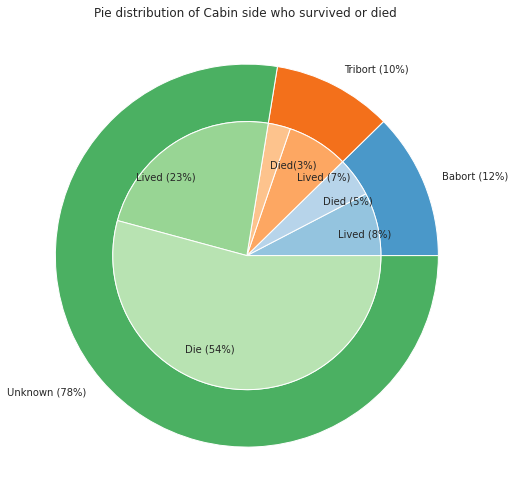

In [ ]:
group_names=[f'Babort ({round(100*babort/(babort+tribort+unknown))}%)',
             f'Tribort ({round(100*tribort/(babort+tribort+unknown))}%)',
             f'Unknown ({round(100*unknown/(babort+tribort+unknown))}%)']
group_size=[(arr_title[0] + arr_title[1]), (arr_title[2] + arr_title[3]),(arr_title[4] + arr_title[5])]
subgroup_names=[f'Lived ({round(100*arr_title[0]/(babort+tribort+unknown))}%)',
                f'Died ({round(100*arr_title[1]/(babort+tribort+unknown))}%)',
                f'Lived ({round(100*arr_title[2]/(babort+tribort+unknown))}%)',
                f'Died({round(100*arr_title[3]/(babort+tribort+unknown))}%) ',
                f'Lived ({round(100*arr_title[4]/(babort+tribort+unknown))}%)',
                f'Die ({round(100*arr_title[5]/(babort+tribort+unknown))}%)']
subgroup_size=[arr_title[0],arr_title[1],arr_title[2],arr_title[3],arr_title[4],arr_title[5]]

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Oranges,plt.cm.Greens]

# First Ring (outside)
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1, labels=group_names, 
                  colors= [a(0.6), b(0.6),c(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1-0.3, 
                   labels=subgroup_names, labeldistance=0.7, 
                   colors=[a(0.4), a(0.3), b(0.4), b(0.3),c(0.4),c(0.3)],textprops={'fontsize': 10})
plt.setp( mypie2, width=0.7, edgecolor='white')
plt.margins(0,0)

ax.set(title="Pie distribution of Cabin side who survived or died ")
plt.tight_layout()
plt.show()

## Insertion of data into model dataframe

Répartition des colonnes en One_hot

In [ ]:
sex = train.Sex.replace(["female", "male"],[0, 1])
train['Pclass'] = train['Pclass'].astype(str)
pclass = pd.get_dummies(train[['Pclass']], prefix='Pclass')
age = pd.get_dummies(pd.DataFrame(catAge, columns = ['catAge']), prefix='catAge')
title = pd.get_dummies(train[['Title']], prefix='Title')
deck = pd.get_dummies(train[['Deck']], prefix='Deck')
side = pd.get_dummies(train[['Side']], prefix='Side')
embarked = pd.get_dummies(train[['Embarked']], prefix='Embarked')
# normalize price 
Norm_Fare = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(train[['Unit_Fare']]), columns = ['Unit_Fare_Norm'])

In [ ]:
model_train = train[["Survived","Ticket_prefix"]].join(sex).join(pclass).join(age).join(title).join(deck).join(side).join(embarked).join(Norm_Fare)
display(model_train.head())

,Survived,Ticket_prefix,Sex,Pclass_1,Pclass_2,Pclass_3,catAge_adulte,catAge_bebe,catAge_enfant,catAge_jeune_adulte,catAge_vieux,Title_Noble,Title_Other,Title_Women_Child,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Side_B,Side_T,Side_U,Embarked_C,Embarked_Q,Embarked_S,Unit_Fare_Norm
0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0.032690
1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0.321416
2,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0.035734
3,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.119714
4,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.119714


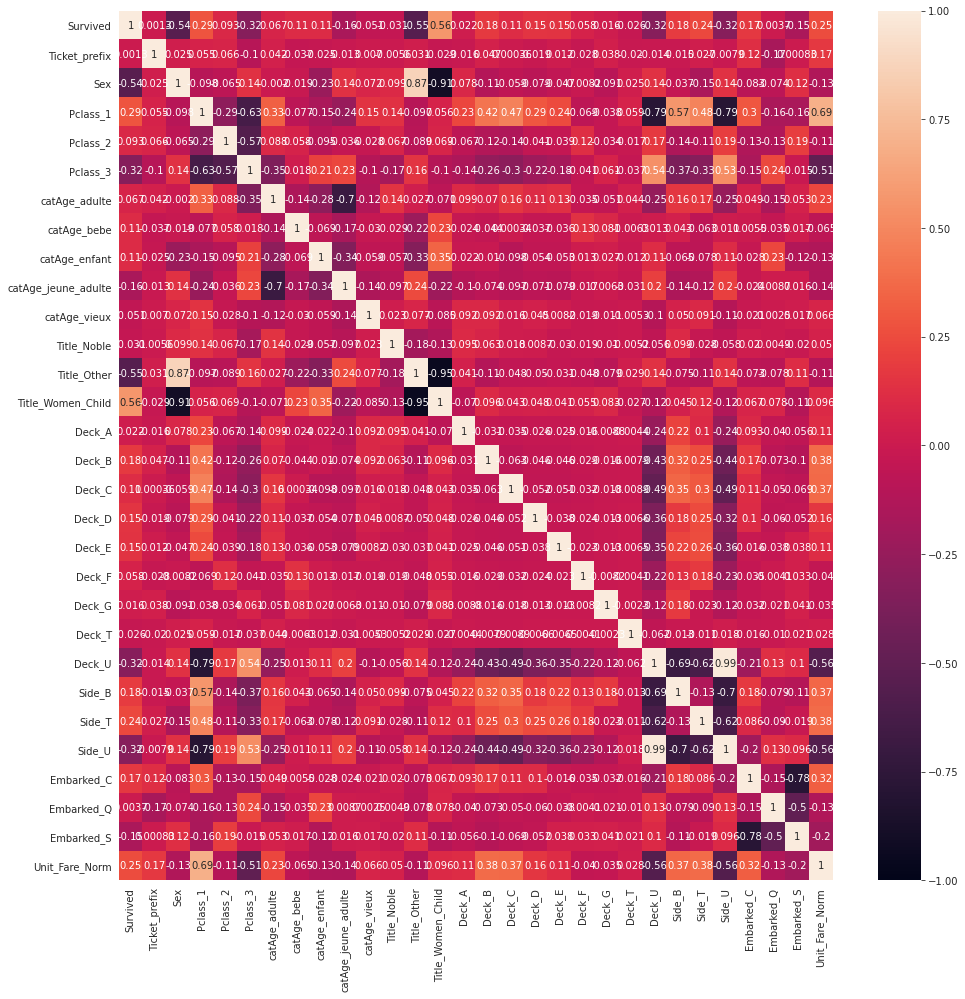

In [ ]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(model_train.corr(),vmin=-1, vmax=1, annot=True, ax = ax)

## Modélisation

### Séparation en train et test

In [ ]:
#@title Titre par défaut
# Split into 70% training and 30% testing set
final_train, final_test = train_test_split(model_train, test_size = 0.3)
display(final_test.head())

,Survived,Ticket_prefix,Sex,Pclass_1,Pclass_2,Pclass_3,catAge_adulte,catAge_bebe,catAge_enfant,catAge_jeune_adulte,catAge_vieux,Title_Noble,Title_Other,Title_Women_Child,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Side_B,Side_T,Side_U,Embarked_C,Embarked_Q,Embarked_S,Unit_Fare_Norm
504,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.135270
649,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0.032577
422,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0.124993
728,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0.058617
65,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0.040581


In [ ]:
train_features = final_train.drop('Survived',axis=1)
test_features = final_test.drop('Survived',axis=1)
# The target need to be an array or series that's why we don't use df[['Survived]]
train_target = final_train['Survived']
test_target = final_test['Survived']

### SVC

In [ ]:
clf = svm.SVC()
clf.fit(train_features, train_target)
predictions = clf.predict(test_features)
#display(predictions)
print ("Score Train : ", round(clf.score(train_features, train_target) *100,4), " %")
print ("Score Test : ", round(clf.score(test_features, test_target) *100,4), " %")

Score Train :  84.2697  %
Score Test :  84.3284  %


### NuSVC

In [ ]:
clf = svm.NuSVC()
clf.fit(train_features, train_target)
predictions = clf.predict(test_features)
print ("Score Train : ", round(clf.score(train_features, train_target) *100,4), " %")
print ("Score Test : ", round(clf.score(test_features, test_target) *100,4), " %")

Score Train :  81.5409  %
Score Test :  82.0896  %


### LinearSVC

In [ ]:
clf = svm.LinearSVC()
clf.fit(train_features, train_target)
predictions = clf.predict(test_features)
print ("Score Train : ", round(clf.score(train_features, train_target) *100,4), " %")
print ("Score Test : ", round(clf.score(test_features, test_target) *100,4), " %")

Score Train :  82.825  %
Score Test :  82.8358  %


### Optimisation des hyperparamètres

In [ ]:
# Regularization parameter
c = [1, 10, 50, 100]

# Specifies the kernel type to be used in the algorithm 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
kernel = ['linear', 'rbf']

# Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
gamma = ['scale', 'auto', 1, 0.1, 0.01, 0.001]

# Degree of the polynomial kernel
#degree = [2, 3, 4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'C': c,
                       'kernel': kernel,
                       'gamma': gamma}

# Create the model to use for hyperparameter tuning
model = svm.SVC()

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

# Fit on the training data
random_cv.fit(train_features, train_target)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=25, n_jobs=-1,
                   param_distributions={'C': [1, 10, 50, 100],
                                        'gamma': ['scale', 'auto', 1, 0.1, 0.01,
                                                  0.001],
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=1)

In [ ]:
random_cv.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Score Train : ", round(random_cv.best_estimator_.score(train_features, train_target) *100,4), " %")
print("Score Test : ", round(random_cv.best_estimator_.score(test_features, test_target) *100,4), " %")

Score Train :  86.0353  %
Score Test :  83.5821  %


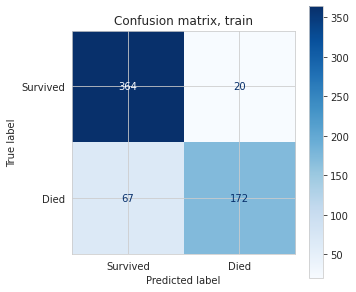

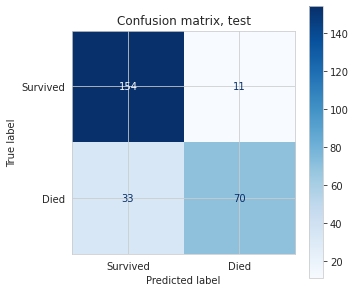

In [ ]:
from sklearn.metrics import plot_confusion_matrix

class_names=["Survived", "Died"]
classifier = random_cv.best_estimator_

titles_options = [("Confusion matrix, train", train_features, train_target),
                  ("Confusion matrix, test", test_features, test_target)]
i=1
for title, X, y in titles_options:
  fig, ax = plt.subplots(figsize=(5, 5))
  plot_confusion_matrix(classifier, X, y,
                        display_labels=class_names,
                        cmap=plt.cm.Blues,
                        normalize=None, 
                        ax=ax, values_format = '')
  ax.set_title(title)

plt.show()

LR: 0.802586 (0.024576)
LDA: 0.799411 (0.024667)
KNN: 0.804122 (0.041076)
CART: 0.799155 (0.048031)
NB: 0.717256 (0.048512)
SVM: 0.789836 (0.047313)
RFC: 0.788070 (0.035334)
Optimized SVM: 0.800947 (0.033991)


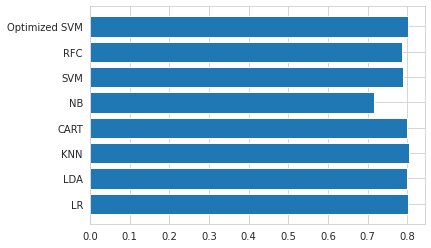

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier()))
models.append(('Optimized SVM', SVC(C=10, kernel='rbf', gamma=0.1)))
# evaluate each model in turn
results = []
names = []
bar_values = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, train_features, train_target, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    bar_values.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

y_pos = np.arange(len(names))
# Create horizontal bars
plt.barh(y_pos, bar_values) 
# Create names on the y-axis
plt.yticks(y_pos, names)
# Show graphic
plt.show()

# Tests

In [ ]:
def predict(sex='female', pclass=3, age=20, title='women_child', deck='U', side='U', embarked='S', norm_unit_fare=0.1, ticket_prefix=0):
  # sex treatment
  if sex == 'male':
    sex = 1
  else :
    sex = 0
  # class treatment
  pclass_1=0
  pclass_2=0
  pclass_3=0
  if pclass==1:
    pclass_1=1
  elif pclass==2:
    pclass_2=1
  else:
    pclass_3=1
  # age treatment
  cat_age_bebe = 0
  cat_age_enfant = 0
  cat_age_jeune_adulte = 0
  cat_age_adulte = 0
  cat_age_vieux = 0
  if age <= 3:
    cat_age_bebe = 1
  elif age > 3 and age <= 16:
    cat_age_enfant = 1
  elif age > 16 and age <= 30:
    cat_age_jeune_adulte = 1
  elif age > 30 and age <= 60:
    cat_age_adulte = 1
  else:
    cat_age_vieux = 1
  # title treatment
  title_other = 0
  title_noble = 0
  title_women_child = 0
  if title == 'other':
    title_other = 1
  elif title=='noble':
    title_noble = 1
  else:
    title_women_child = 1
  # Deck treatment
  deck_A=0
  deck_B=0
  deck_C=0
  deck_D=0
  deck_E=0
  deck_F=0
  deck_G=0
  deck_T=0
  deck_U=0
  if deck=='A':
    deck_A=1
  elif deck=='B':
    deck_B=1
  elif deck=='C':
    deck_C=1
  elif deck=='D':
    deck_D=1
  elif deck=='E':
    deck_E=1
  elif deck=='F':
    deck_F=1
  elif deck=='G':
    deck_G=1
  elif deck=='T':
    deck_T=1
  else:
    deck_U=1
  # side treatment
  side_B=0
  side_T=0
  side_U=0
  if side=='B':
    side_B=1
  elif side=='T':
    side_T=1
  else:
    side_U=1
  # embarked treatment
  embarked_Q=0
  embarked_C=0
  embarked_S=0
  if embarked=='Q':
    embarked_Q=1
  elif embarked=='C':
    embarked_C=1
  else:
    embarked_S=1
  
  result = clf.predict([[ticket_prefix, sex, pclass_1, pclass_2, pclass_3,
                     cat_age_adulte, cat_age_bebe, cat_age_enfant,cat_age_jeune_adulte, cat_age_vieux,
                     title_other, title_noble, title_women_child,
                     deck_A, deck_B, deck_C, deck_D, deck_E, deck_F, deck_G, deck_T, deck_U,
                     side_B, side_T, side_U, embarked_C, embarked_Q, embarked_S, norm_unit_fare]])
  if result == 1:
    print('Survived')
  else:
    print('Died')

In [ ]:
predict()

Survived
